In [1]:
from scipy.io import netcdf as nc
import numpy as np
import matplotlib.pylab as plt
from pylab import *
from scipy.signal import *
import scipy.io
from mpl_toolkits.basemap import Basemap

In [2]:
def readnc_1d(ncfile,varname):
        fid = nc.netcdf_file(ncfile, 'r')
        out = np.array(fid.variables[varname][:]).squeeze()
        fid.close()
        return out

In [3]:
def readnc_2d(ncfile,varname):
        fid = nc.netcdf_file(ncfile, 'r')
        out = np.array(fid.variables[varname][:,:]).squeeze()
        fid.close()
        return out

In [4]:
def gen_pal_blue2red2():
    pal = ( ( 0.0000, 0.0000, 0.800 ),
    ( 0.0000, 0.2500, 1.0000 ),
    ( 0.0000, 0.5000, 1.0000 ),
    ( 0.0000, 0.7500, 1.0000 ),
    ( 0.0000, 0.8300, 1.0000 ),
    ( 0.2500, 1.0000, 1.0000 ),
    ( 0.7840, 1.0000, 1.0000 ),
    ( 0.9600, 0.9600, 0.9600 ),
    ( 1.0000, 0.6300, 0.6300 ),
    ( 1.0000, 0.5000, 0.5000 ),
    ( 1.0000, 0.3800, 0.3800 ),
    ( 1.0000, 0.2941, 0.2941 ),
    ( 1.0000, 0.1300, 0.1300 ),
    ( 0.9297, 0.1719, 0.1719 ),
    ( 0.8000, 0.0000, 0.0000 ) )
    pal_blue2red2 = plt.matplotlib.colors.LinearSegmentedColormap.from_list('pal_blue2red2',pal)
    return pal_blue2red2

In [5]:
def gen_pal_Testu():
    pal = ( ( 1.0000, 1.0000, 1.0000 ),
    ( 0.9923, 0.9753, 0.9985 ),
    ( 0.9692, 0.9005, 0.9941 ),
    ( 0.9460, 0.8258, 0.9897 ),
    ( 0.9228, 0.7510, 0.9853 ),
    ( 0.8996, 0.6763, 0.9809 ),
    ( 0.8765, 0.6015, 0.9765 ),
    ( 0.8533, 0.5268, 0.9721 ),
    ( 0.8301, 0.4520, 0.9677 ),
    ( 0.8070, 0.3773, 0.9633 ),
    ( 0.7838, 0.3025, 0.9588 ),
    ( 0.7606, 0.2278, 0.9544 ),
    ( 0.7374, 0.1530, 0.9500 ),
    ( 0.7221, 0.0783, 0.9563 ),
    ( 0.7258, 0.0035, 0.9885 ),
    ( 0.6323, 0.0000, 0.9900 ),
    ( 0.5335, 0.0000, 0.9900 ),
    ( 0.4346, 0.0000, 0.9900 ),
    ( 0.3363, 0.0000, 0.9900 ),
    ( 0.0984, 0.0000, 0.9900 ),
    ( 0.0000, 0.0000, 0.9494 ),
    ( 0.0000, 0.0000, 0.8820 ),
    ( 0.0000, 0.0000, 0.8155 ),
    ( 0.0000, 0.0000, 0.7480 ),
    ( 0.0000, 0.0000, 0.6804 ),
    ( 0.0000, 0.0000, 0.6045 ),
    ( 0.0000, 0.0000, 0.5036 ),
    ( 0.0063, 0.0617, 0.3724 ),
    ( 0.0096, 0.1057, 0.2765 ),
    ( 0.0109, 0.1349, 0.2249 ),
    ( 0.0141, 0.1726, 0.2249 ),
    ( 0.0209, 0.2273, 0.2548 ),
    ( 0.0257, 0.2543, 0.2887 ),
    ( 0.0333, 0.2741, 0.3453 ),
    ( 0.0574, 0.3491, 0.4794 ),
    ( 0.0730, 0.4022, 0.5242 ),
    ( 0.0839, 0.4442, 0.5393 ),
    ( 0.0940, 0.4826, 0.5465 ),
    ( 0.1125, 0.5337, 0.5808 ),
    ( 0.1228, 0.5695, 0.5852 ),
    ( 0.1466, 0.6213, 0.6213 ),
    ( 0.1847, 0.6887, 0.6887 ),
    ( 0.2287, 0.7552, 0.7552 ),
    ( 0.2810, 0.8226, 0.8226 ),
    ( 0.3223, 0.8724, 0.8724 ),
    ( 0.3528, 0.9058, 0.9058 ),
    ( 0.3863, 0.9402, 0.9402 ),
    ( 0.4210, 0.9736, 0.9736 ),
    ( 0.4217, 0.9900, 0.9675 ),
    ( 0.3873, 0.9844, 0.9218 ),
    ( 0.3445, 0.9511, 0.8700 ),
    ( 0.2788, 0.9455, 0.7482 ),
    ( 0.2174, 0.9286, 0.6266 ),
    ( 0.1730, 0.8944, 0.5382 ),
    ( 0.1709, 0.8611, 0.5492 ),
    ( 0.1526, 0.7998, 0.5295 ),
    ( 0.1289, 0.7327, 0.4932 ),
    ( 0.1030, 0.6708, 0.4391 ),
    ( 0.0739, 0.6364, 0.3426 ),
    ( 0.0591, 0.5754, 0.3074 ),
    ( 0.0485, 0.5083, 0.2866 ),
    ( 0.0388, 0.4416, 0.2649 ),
    ( 0.0302, 0.3740, 0.2408 ),
    ( 0.0281, 0.4133, 0.2101 ),
    ( 0.0185, 0.4347, 0.1273 ),
    ( 0.0157, 0.4121, 0.0000 ),
    ( 0.1522, 0.4797, 0.0000 ),
    ( 0.1900, 0.5473, 0.0000 ),
    ( 0.2179, 0.6149, 0.0000 ),
    ( 0.2694, 0.6824, 0.0000 ),
    ( 0.3237, 0.7489, 0.0000 ),
    ( 0.3933, 0.7909, 0.0000 ),
    ( 0.4685, 0.8247, 0.0000 ),
    ( 0.5449, 0.8580, 0.0000 ),
    ( 0.6229, 0.8913, 0.0000 ),
    ( 0.7209, 0.9253, 0.0000 ),
    ( 0.8326, 0.9455, 0.0000 ),
    ( 0.9430, 0.9430, 0.0000 ),
    ( 0.9086, 0.9086, 0.0000 ),
    ( 0.8996, 0.8646, 0.0000 ),
    ( 0.8996, 0.8073, 0.0000 ),
    ( 0.8996, 0.7353, 0.0000 ),
    ( 0.8996, 0.6626, 0.0000 ),
    ( 0.8996, 0.5904, 0.0000 ),
    ( 0.8996, 0.5184, 0.0000 ),
    ( 0.8996, 0.4464, 0.0000 ),
    ( 0.8996, 0.3744, 0.0000 ),
    ( 0.8996, 0.3024, 0.0000 ),
    ( 0.8996, 0.2304, 0.0000 ),
    ( 0.8984, 0.1568, 0.0000 ),
    ( 0.8652, 0.0366, 0.0000 ),
    ( 0.8080, 0.0000, 0.0000 ),
    ( 0.7285, 0.0000, 0.0000 ),
    ( 0.6277, 0.0000, 0.0000 ),
    ( 0.5268, 0.0000, 0.0000 ),
    ( 0.4260, 0.0000, 0.0000 ),
    ( 0.3251, 0.0000, 0.0000 ),
    ( 0.2242, 0.0000, 0.0000 ),
    ( 0.1234, 0.0000, 0.0000 ),
    ( 0.0900, 0.0000, 0.0000 ) )
    pal_Testu = plt.matplotlib.colors.LinearSegmentedColormap.from_list('pal_Testu',pal)
    return pal_Testu

In [6]:
for i in np.arange(0,11,1):
    f_corr = '/Volumes/LaCie/Data/Data_for_Plot/Correlation_OSSE'+str(i+1)+'.txt'
    print(i)
        
    with open(f_corr) as f:
        rows = [[str(x) for x in line.split(';')] for line in f]
        lat_list,lon_list,corr_val = [list(col) for col in zip(*rows)] 
        f.close()
        
    if i == 0:
        Corr = np.ones((11,len(lat_list)))

    lat_list = np.array(lat_list)
    lat_list= lat_list.astype(np.float)    
    lon_list = np.array(lon_list)
    lon_list= lon_list.astype(np.float)  
    corr_val = np.array(corr_val)
    Corr[i,:]= corr_val.astype(np.float)

0
1
2
3
4
5
6
7
8
9
10


In [7]:
lat_test = np.arange(-89.5,90.5,1)
lon_test = np.arange(-179.5, 180.5,1)
lon2, lat2 = np.meshgrid(lon_test,lat_test)

In [8]:
File_name = ['OSSE1','OSSE2','OSSE3','OSSE4','OSSE5','OSSE6','OSSE7','OSSE8','OSSE9','OSSE10','OSSE11']

/Users/annasommer/opt/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  after removing the cwd from sys.path.
/Users/annasommer/opt/miniconda3/lib/python3.7/site-packages/matplotlib/contour.py:1520: UserWarning: Warning: converting a masked element to nan.
  self.zmax = float(z.max())
/Users/annasommer/opt/miniconda3/lib/python3.7/site-packages/matplotlib/contour.py:1521: UserWarning: Warning: converting a masked element to nan.
  self.zmin = float(z.min())


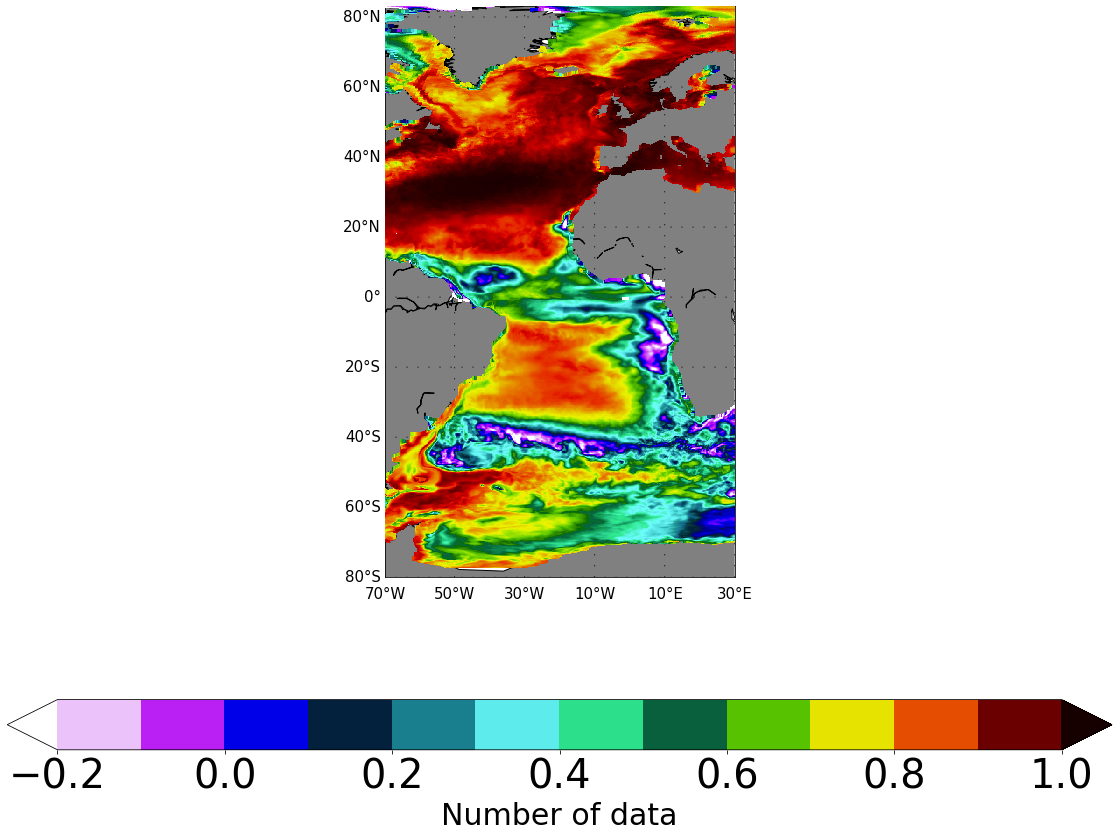

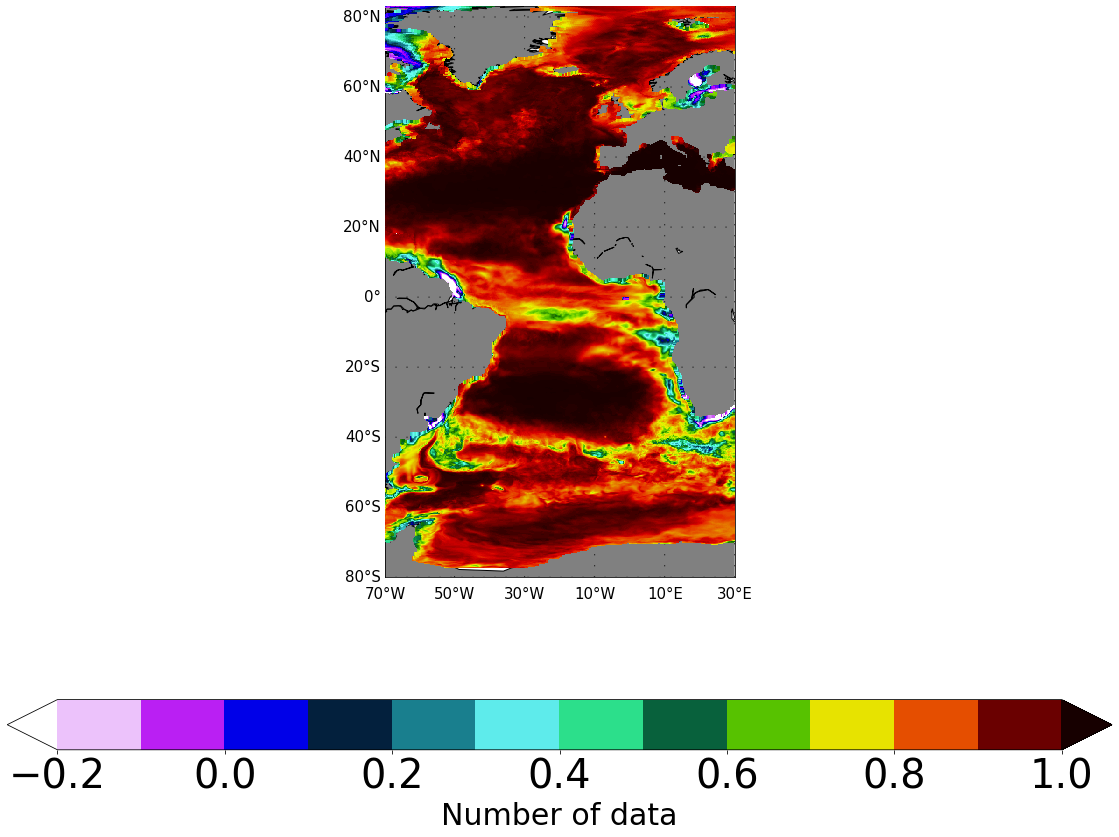

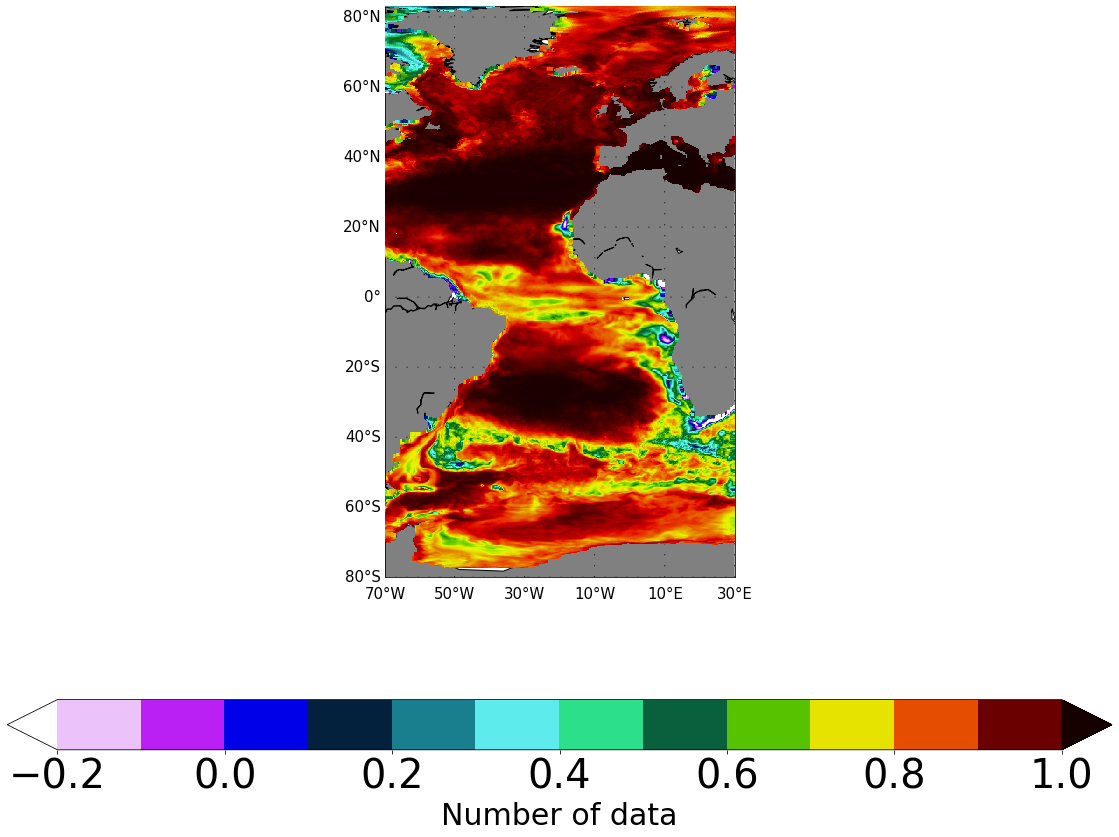

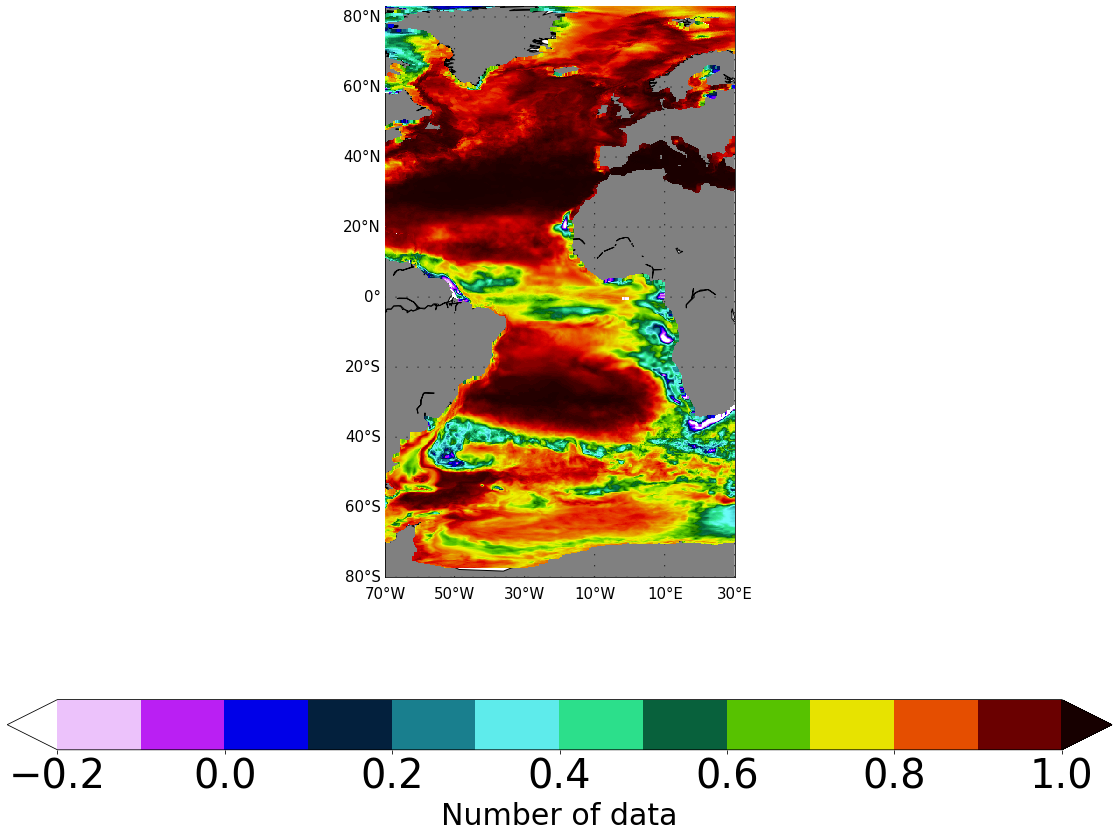

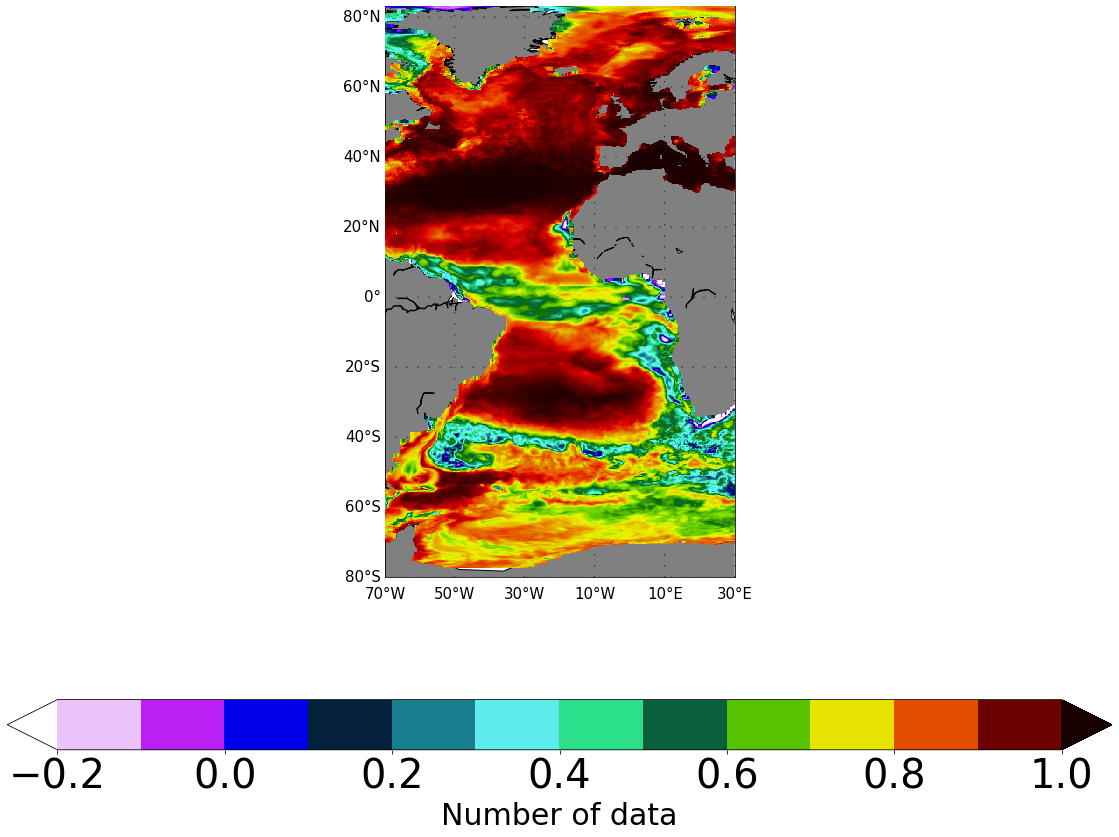

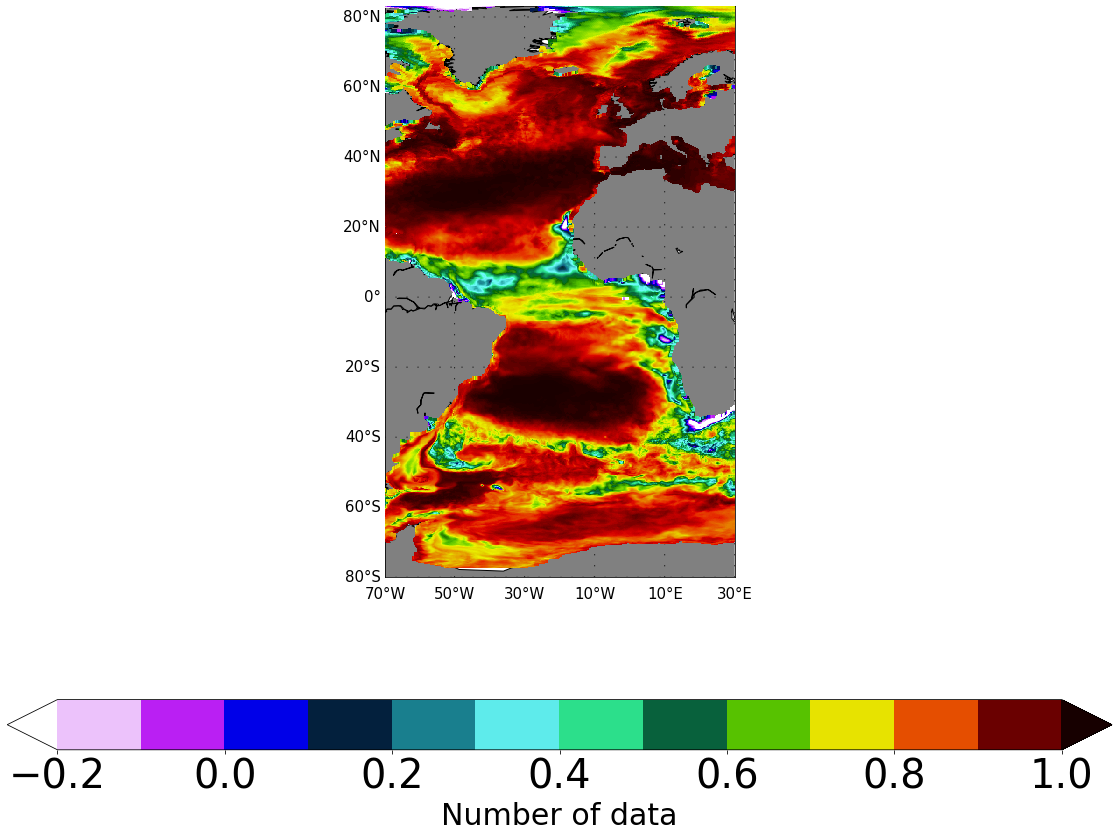

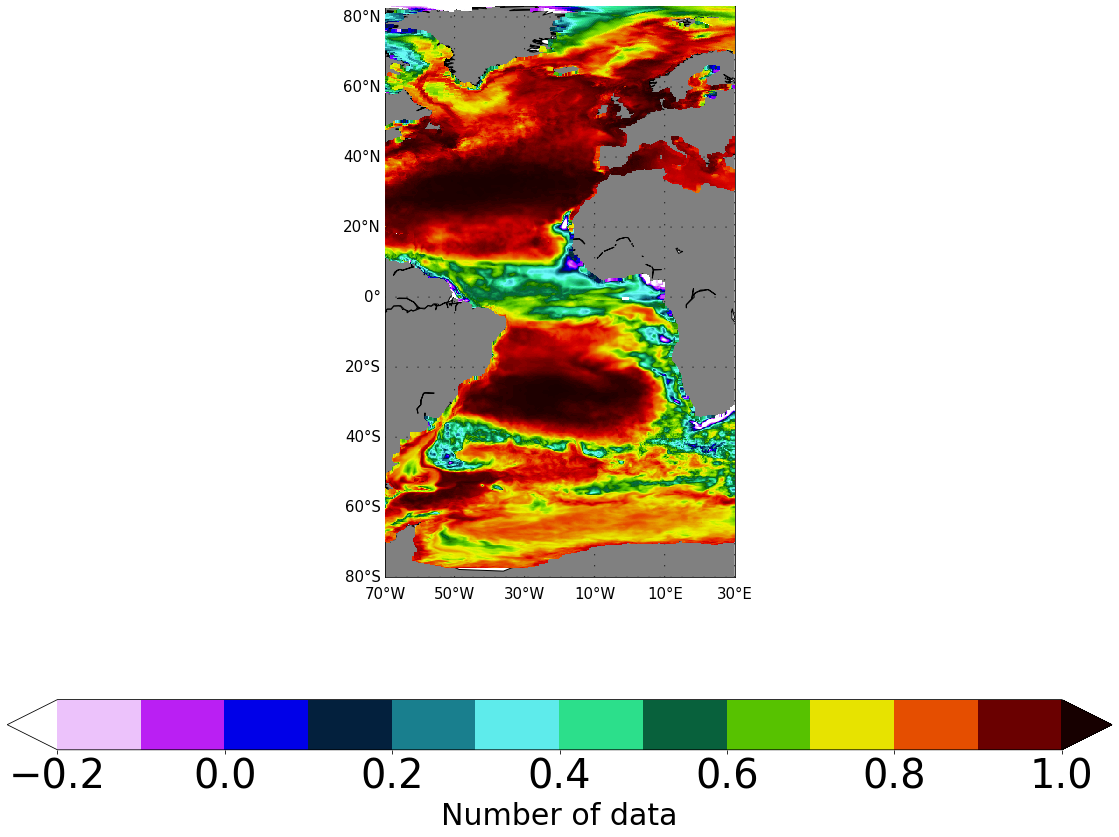

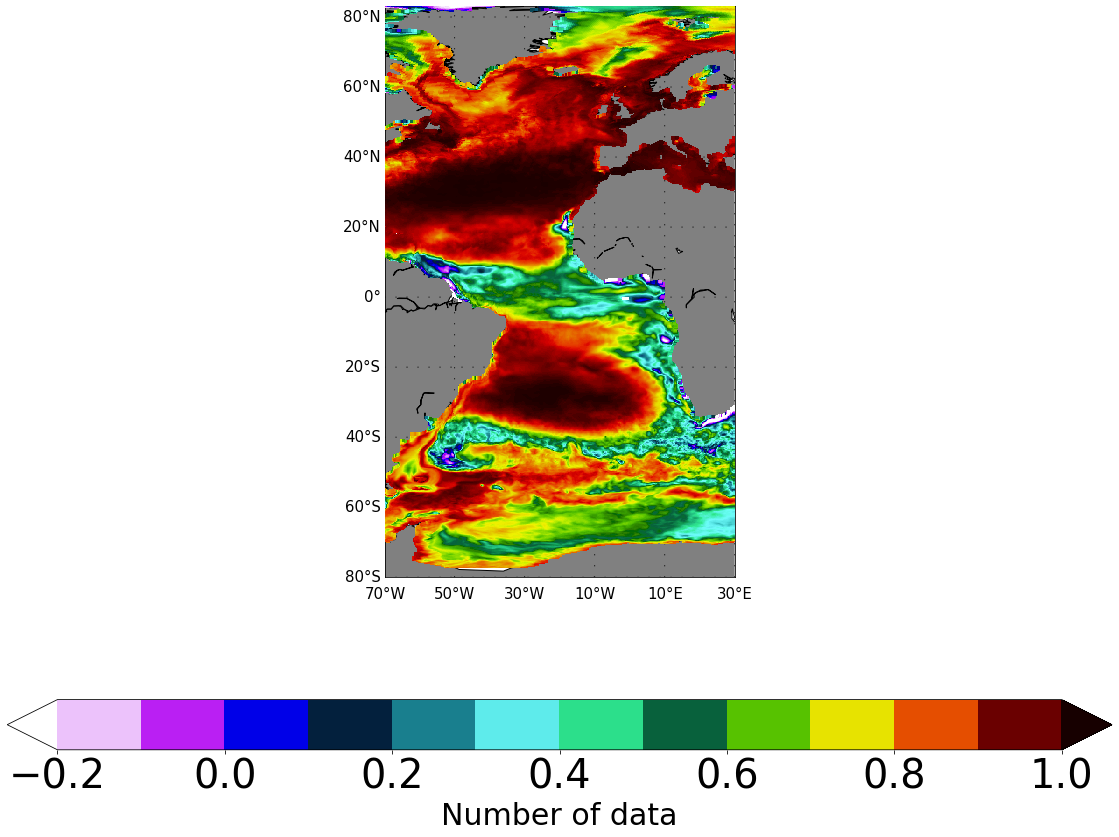

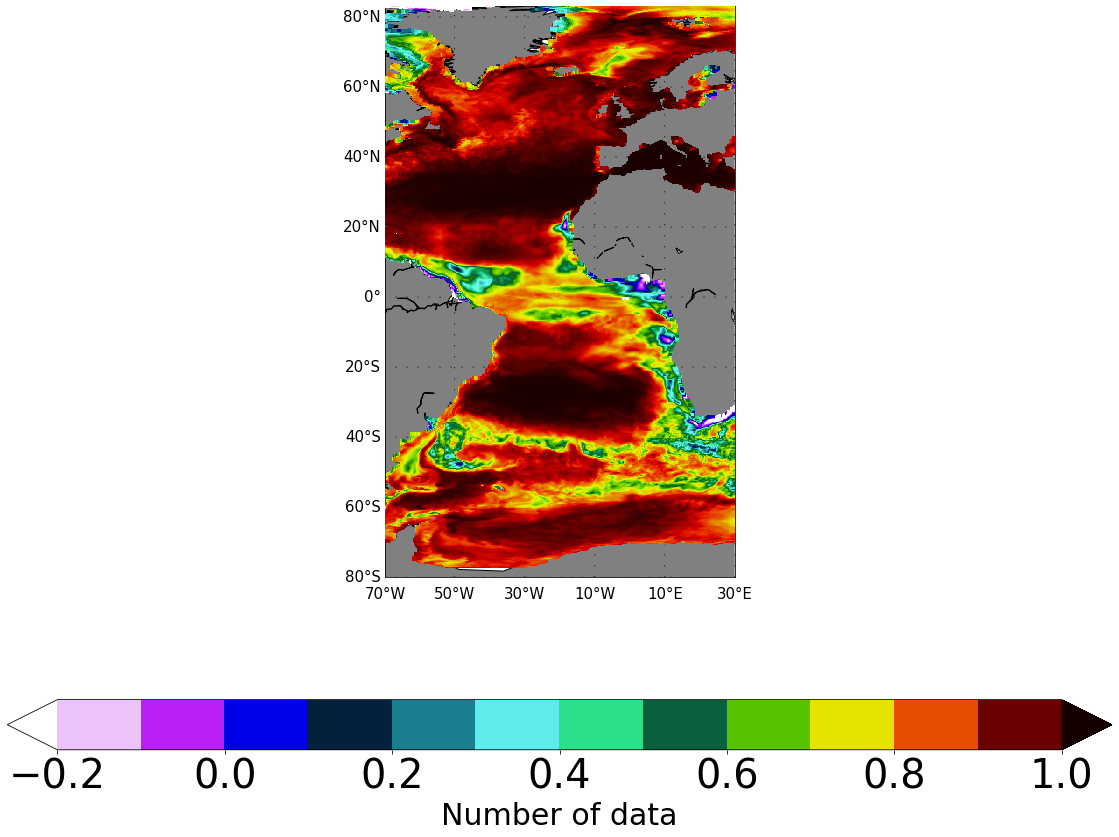

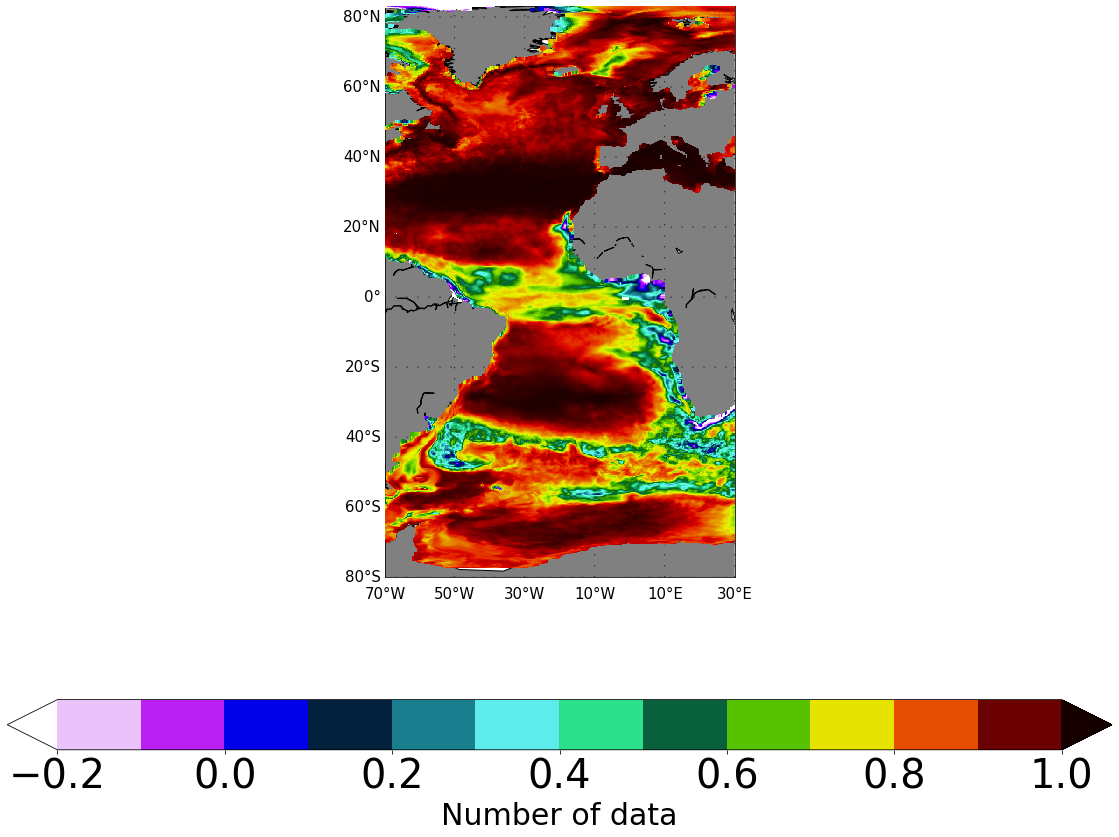

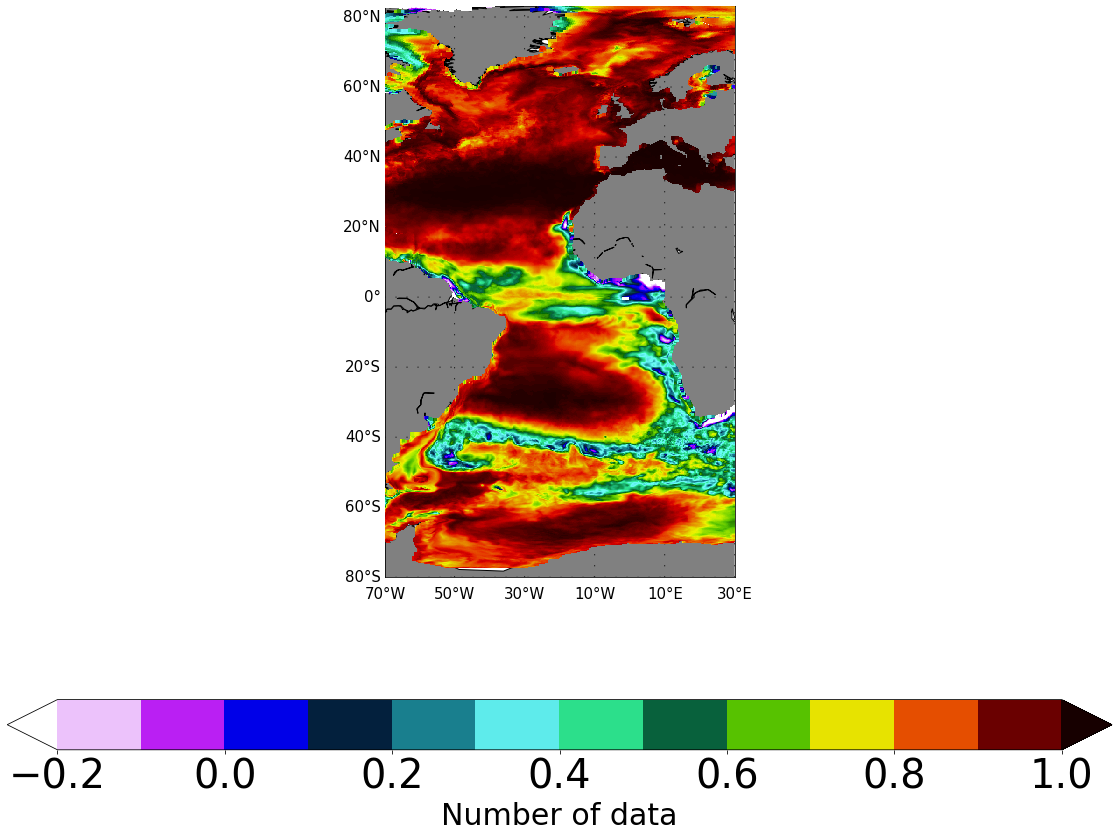

In [9]:
for i in np.arange(0,11,1):
    plt.figure(figsize=[20. , 15.],facecolor='w')
    limits=[-0.2,1.]
    m = Basemap(projection='cyl',llcrnrlat=-80,urcrnrlat=83,llcrnrlon=-70,urcrnrlon=30)
    m.drawcoastlines()
    m.fillcontinents(color='grey',lake_color='white',zorder = 0)
    parallels = np.arange(-80.,81,20.)
    m.drawparallels(parallels,dashes=[1,10],labels=[1,0,0,0],fontsize=15) #[False,True,True,False])
    meridians = np.arange(10.,351.,20.)
    m.drawmeridians(meridians,dashes=[1,10],labels=[True,False,False,True],fontsize=15)
    norm = mpl.colors.Normalize(vmin=limits[0], vmax=limits[1])
    pal = gen_pal_Testu()
    contours = np.arange(-0.2,1.1,0.1)
    C1 = m.contourf(lon2,lat2,np.ones((len(lat_test),len(lon_test)))*np.nan,contours,cmap=pal,norm=norm,extend='both')
    cbar = plt.colorbar(C1,orientation='horizontal',shrink=0.99)
    plt.clim(limits[0],limits[1])
    cbar.set_label('Number of data',fontsize=30)
    cbar.ax.tick_params(labelsize=40)
    plt.scatter(lon_list, lat_list, marker='s', c=Corr[i,:], vmin=-0.2, vmax=1., s=10, zorder=10,edgecolor='None',cmap=pal)
    locs, labels = plt.xticks(size = 30)
    locsY,labelsy = plt.yticks(size = 30)
    plt.ylim(-80.,83.)
    plt.savefig('/Users/annasommer/Documents/Documents/OSSE_Project/Figures/CorrCoeff_'+File_name[i]+'.png')


In [10]:
numb_of_biom = ['0','9','10','11','12','13','15','16','17']

In [11]:
for numb_b in numb_of_biom:
    Biome_region = np.ones(len(lat_list))
    Biome_region_82 = np.ones(len(lat_list))
    
    print('Biom: ',numb_b)
    direct = "/Volumes/LaCie/Data/Time_Varying_Biomes.nc"
    Mask_Rod = readnc_2d(direct,'MeanBiomes')
    lon_Rod = readnc_1d(direct,'lon')
    lat_Rod = readnc_1d(direct,'lat')
                        
    Mask_Rod_Turn = np.zeros((len(lat_Rod),len(lon_Rod)))

    for i in np.arange(0,len(lat_Rod),1):
        for j in np.arange(0,len(lon_Rod),1):
            Mask_Rod_Turn[i,j] = Mask_Rod[j,i]

    lon2, lat2 = np.meshgrid(lon_Rod,lat_Rod)  
        
    for i in np.arange(0,len(lat_Rod),1):
        for j in np.arange(0,len(lon_Rod),1):
            if numb_b == '0':
                if lat_Rod[i] < lat_list.max() and lat_Rod[i] > lat_list.min() and lon_Rod[j] < lon_list.max() and lon_Rod[j] > lon_list.min():
                    if math.isnan(Mask_Rod_Turn[i,j]) == True or Mask_Rod_Turn[i,j] == 1 or Mask_Rod_Turn[i,j] == 8 or lat_Rod[i] > 82.:
                        test_lat_Rod = np.isclose(lat_list,lat_Rod[i],atol=0.5)
                        test_lon_Rod = np.isclose(lon_list,lon_Rod[j],atol=0.5)
                        mult = test_lat_Rod * test_lon_Rod
                        kk1 = np.where(mult==True)
                        kk = kk1[0]
                        sh = kk.shape
                        if sh[0] > 0:
                            for tt in np.arange(0,sh[0],1):
                                  Biome_region[kk[tt]] = np.nan
                    if lat_Rod[i] > 82.:
                        test_lat_Rod = np.isclose(lat_list,lat_Rod[i],atol=0.5)
                        test_lon_Rod = np.isclose(lon_list,lon_Rod[j],atol=0.5)
                        mult = test_lat_Rod * test_lon_Rod
                        kk1 = np.where(mult==True)
                        kk = kk1[0]
                        sh = kk.shape
                        if sh[0] > 0:
                            for tt in np.arange(0,sh[0],1):
                                  Biome_region_82[kk[tt]] = np.nan
                                
            else:
                if lat_Rod[i] < lat_list.max() and lat_Rod[i] > lat_list.min() and lon_Rod[j] < lon_list.max() and lon_Rod[j] > lon_list.min():
                    if math.isnan(Mask_Rod_Turn[i,j]) == True or Mask_Rod_Turn[i,j] == 1 or Mask_Rod_Turn[i,j] == 8 or lat_Rod[i] > 82. or Mask_Rod_Turn[i,j] > int(numb_b) or Mask_Rod_Turn[i,j] < int(numb_b):
                        test_lat_Rod = np.isclose(lat_list,lat_Rod[i],atol=0.5)
                        test_lon_Rod = np.isclose(lon_list,lon_Rod[j],atol=0.5)
                        mult = test_lat_Rod * test_lon_Rod
                        kk1 = np.where(mult==True)
                        kk = kk1[0]
                        sh = kk.shape
                        if sh[0] > 0:
                            for tt in np.arange(0,sh[0],1):
                                  Biome_region[kk[tt]] = np.nan

    print('Biom: ', numb_b)
    for i in np.arange(0,11,1):
        print('OSSE: ', i+1)
        if numb_b == '0':
            print('Total Correlation: ', np.nanmean(Corr[i,:]*Biome_region_82[:]))
        print('Correlation: ', np.nanmean(Corr[i,:]*Biome_region[:]))

Biom:  0
Biom:  0
OSSE:  1
Total Correlation:  0.6803356022875152
Correlation:  0.678107975133643
OSSE:  2
Total Correlation:  0.8811109093486325
Correlation:  0.8992630159093954
OSSE:  3
Total Correlation:  0.8657268795462502
Correlation:  0.8749300056360165
OSSE:  4
Total Correlation:  0.8213398216821975
Correlation:  0.8284346673507549
OSSE:  5
Total Correlation:  0.799107937369407
Correlation:  0.8044841342017233
OSSE:  6
Total Correlation:  0.8403771058684834
Correlation:  0.8529523179797821
OSSE:  7
Total Correlation:  0.8074569384687618
Correlation:  0.8204527551278257
OSSE:  8
Total Correlation:  0.7665878623279193
Correlation:  0.7709672142088139
OSSE:  9
Total Correlation:  0.867762178415017
Correlation:  0.8791030905699535
OSSE:  10
Total Correlation:  0.8480401141328809
Correlation:  0.8550996890411641
OSSE:  11
Total Correlation:  0.8234792348541353
Correlation:  0.8297843977304811
Biom:  9
Biom:  9
OSSE:  1
Correlation:  0.8887134000718616
OSSE:  2
Correlation:  0.9121516